In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.set(style='ticks')

/nix/store/q5ibyls5r0dpx9jppakvcl2m64z85gja-python3-3.4.4-env/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
#import the data

FLOAT_ERROR_TOLERANCE = 0.00000000001 #See IEEE 754 for why a floating point is never perfect
df = pd.read_csv('../data/one_ball_short.csv',index_col=False)
#for index, row in df.iterrows():
#    df.at[index,'Time'] = row['Time'].replace(' ', '.')
to_drop = ['Time','ID','ResetID','checkCorrectness']
df.drop(to_drop, inplace=True, axis=1)
df = df.apply(pd.to_numeric)

# clean up data
#df['Yaw'] += np.pi

#df.columns = ['X','Y','Yaw']
df.to_csv('../data/clean-wall-collision.csv', index = False)
print(df.head())


     X    Y  Yaw  NumberOfWalls
0  0.0  0.0  0.0              0
1  0.0  0.0  0.0              0
2  0.0  0.0  0.0              0
3  0.0  0.0  0.0              0
4  0.0  0.0  0.0              0


Plug in appropriate classification function here!

I think we should still discretize over orientation

In [8]:
RESOLUTION_OF_S1 = 0.1 #This is used to discretize the yaw angle over 0 - 2*pi

def classify(x,y,numwalls):
    walls = 0
    if abs(x) > 0.45:
        walls += 1
    if abs(y) > 0.45:
        walls += 1
    if walls == 0:
        return "FREE"
    elif walls == 1:
        return "WALL"
    else:
        return "CORNER"
    #disc_yaw = (int(yaw / RESOLUTION_OF_S1) * RESOLUTION_OF_S1)
    #if int(numwalls) == 0:
    #    return "FREE"
    #elif int(numwalls) == 1:
    #    return "WALL"
    #else:
    #    return "CORNER"

In [9]:
df_discretized = pd.read_csv('../data/clean-wall-collision.csv', index_col=False)

df_discretized['StateLabel'] = df_discretized.apply(lambda dat: classify(dat['X'],dat['Y'], dat['NumberOfWalls']),axis=1)
df_discretized.to_csv('../data/classified-time-series.csv', index = False)

print(df_discretized.head())

     X    Y  Yaw  NumberOfWalls StateLabel
0  0.0  0.0  0.0              0       FREE
1  0.0  0.0  0.0              0       FREE
2  0.0  0.0  0.0              0       FREE
3  0.0  0.0  0.0              0       FREE
4  0.0  0.0  0.0              0       FREE


Plot classified states to make sure that corner/wall/free classification is working

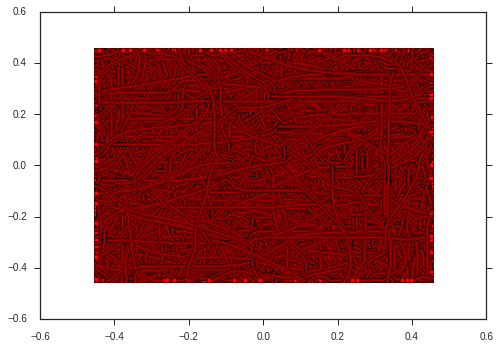

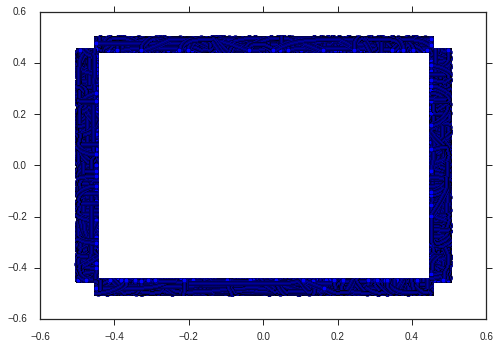

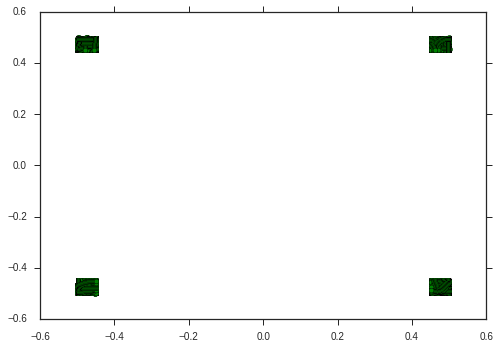

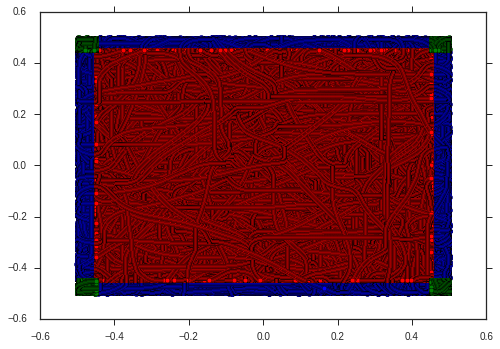

In [13]:

free = df_discretized.loc[df_discretized['StateLabel'] == 'FREE']
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)
plt.scatter(free['X'],free['Y'],c='red',marker='o',edgecolors=None)
plt.show()

wall = df_discretized.loc[df_discretized['StateLabel'] == 'WALL']
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)
plt.scatter(wall['X'],wall['Y'],c='blue',marker='o',edgecolors=None)
plt.show()

corner = df_discretized.loc[df_discretized['StateLabel'] == 'CORNER']
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)
plt.scatter(corner['X'],corner['Y'],c='green',marker='o',edgecolors=None)
plt.show()



In [15]:
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)
plt.scatter(wall['X'],wall['Y'],c='blue',marker='o',edgecolors=None)
plt.scatter(free['X'],free['Y'],c='red',marker='o',edgecolors=None)
plt.scatter(corner['X'],corner['Y'],c='green',marker='o',edgecolors=None)
plt.show()

25235165

In [13]:
len(df_discretized[df_discretized['StateLabel'] == 'FREE']); len(df_discretized[df_discretized['StateLabel'] == 'WALL'])

0

In [14]:
len(df_discretized[df_discretized['StateLabel'] == 'CORNER'])

0

In [7]:
min(df_discretized['Y'])

-0.50202500000000005